     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606
     Country/Region  Confirmed  Deaths  Deaths / 100 Cases
173              US    4290259  148011                3.45
23           Brazil    2442375   87618                3.59
177  United Kingdom     301708   45844               15.19
111          Mexico     395489   44022               11.13
85            Italy     246286   35112               14.26
79            India    1480073   33408                2.26
61           France     220352   30212               13.71
157           Spain     272421   28432               10.44
132            Peru     389717   18418                4.73
81             Iran     293606   15912                5.42


C:\Users\Nikku\AppData\Local\Temp\ipykernel_13768\3884979468.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Deaths", y="Country/Region", data=death, palette="Reds_r")


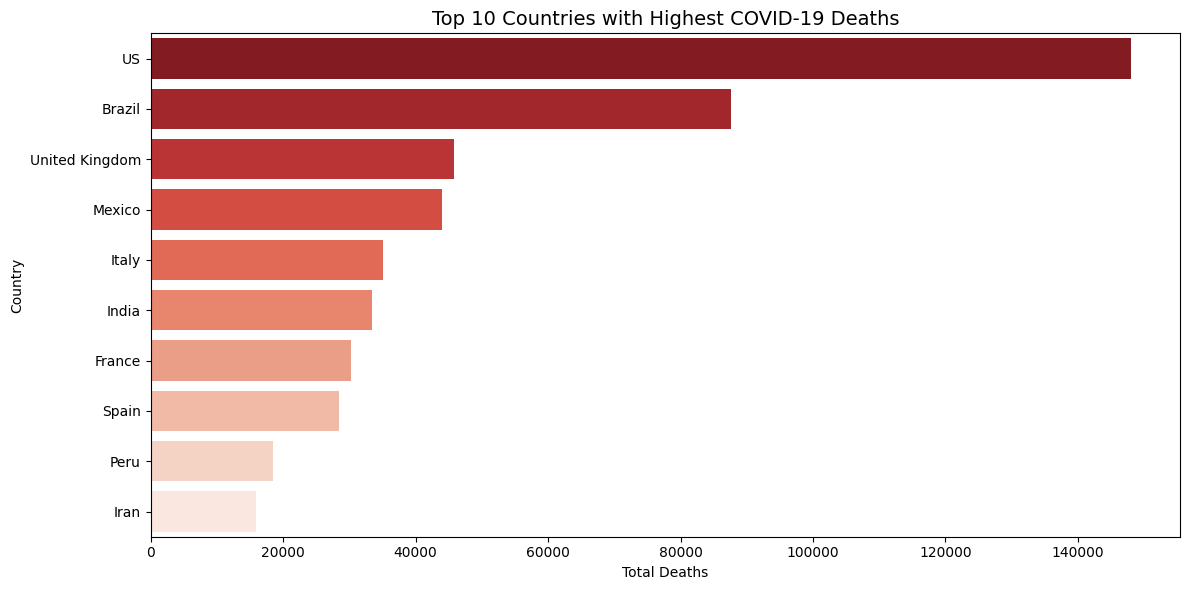

     Country/Region  Confirmed  Deaths   Active
173              US    4290259  148011  2816444
23           Brazil    2442375   87618   508116
79            India    1480073   33408   495499
177  United Kingdom     301708   45844   254427
138          Russia     816680   13334   201097
154    South Africa     452529    7067   170537
37         Colombia     257101    8777   117163
61           France     220352   30212   108928
32           Canada     116458    8944   107514
132            Peru     389717   18418    98752
WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64


C:\Users\Nikku\AppData\Local\Temp\ipykernel_13768\3884979468.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="New cases", y="Country/Region", data=new_cases, palette="Set2")


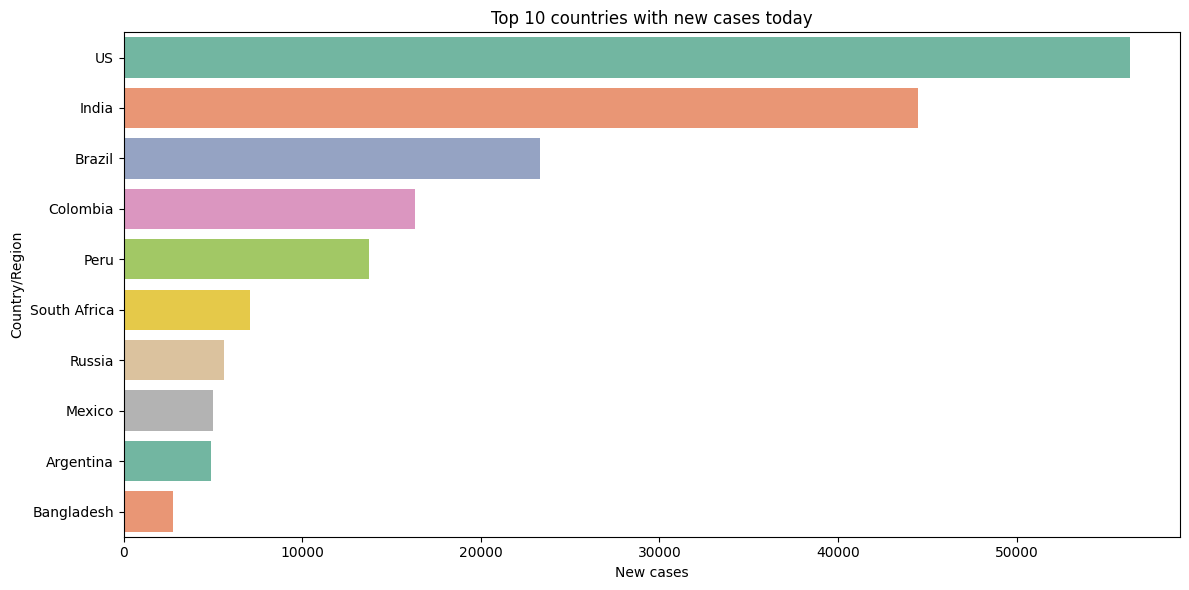

    Country/Region  Confirmed  Deaths  Recovered
23          Brazil    2442375   87618    1846641
173             US    4290259  148011    1325804
79           India    1480073   33408     951166
138         Russia     816680   13334     602249
35           Chile     347923    9187     319954
111         Mexico     395489   44022     303810
154   South Africa     452529    7067     274925
132           Peru     389717   18418     272547
81            Iran     293606   15912     255144
128       Pakistan     274289    5842     241026
Country/Region           India          US
Confirmed           1480073.00  4290259.00
Deaths                33408.00   148011.00
Deaths / 100 Cases        2.26        3.45
1 week % increase        28.11       11.88


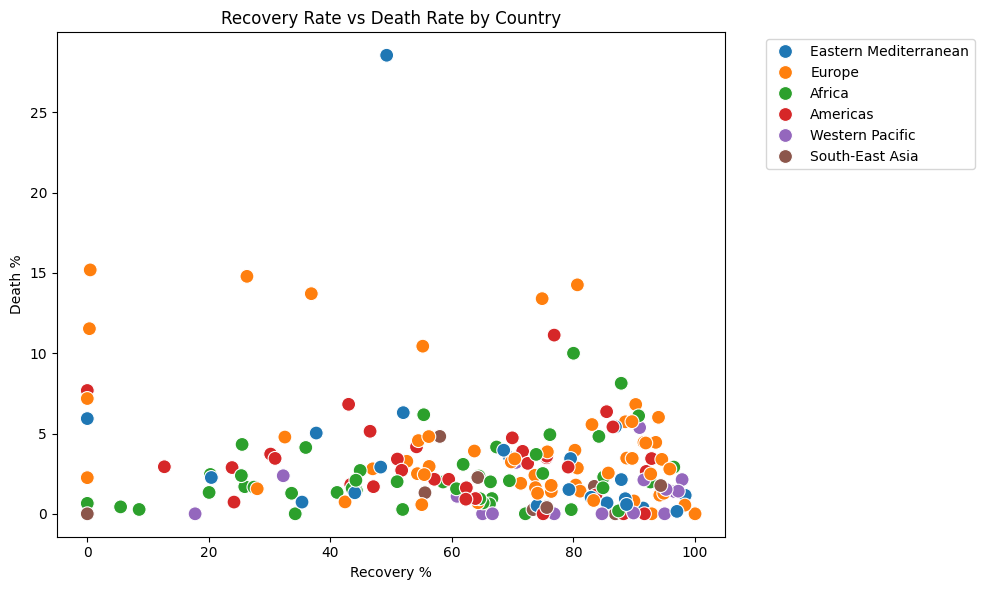

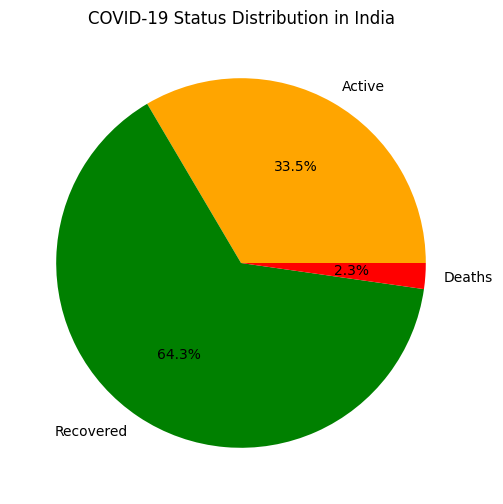

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("country_wise_latest.csv")
# print(df.head())
# print(df.isnull().sum())

# 1. Top 10 Countries with Most Confirmed Cases
top_confirmed = df.sort_values(by="Confirmed", ascending=False).head(10)
print(top_confirmed[["Country/Region","Confirmed"]])


# 2. Which country has the highest death?
death = df.sort_values(by="Deaths", ascending=False).head(10)
print(death[["Country/Region","Confirmed","Deaths","Deaths / 100 Cases"]])

plt.figure(figsize=(12,6))
sns.barplot(x="Deaths", y="Country/Region", data=death, palette="Reds_r")
plt.title("Top 10 Countries with Highest COVID-19 Deaths", fontsize=14)
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# 3. Which country has the most active cases?
active_cases = df.sort_values(by="Active", ascending=False).head(10)
print(active_cases[["Country/Region","Confirmed","Deaths","Active"]])


# 4. Which WHO region has the most confirmed cases in total?
grouped = df.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False)
print(grouped)


# 5. Plot bar chart: Top 10 countries with new cases today.
new_cases = df.sort_values(by="New cases", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="New cases", y="Country/Region", data=new_cases, palette="Set2")
plt.title("Top 10 countries with new cases today")
plt.tight_layout()
plt.show()


# 6. Which country has the highest recovery?
recovery = df.sort_values(by="Recovered", ascending=False).head(10)
print(recovery[["Country/Region","Confirmed","Deaths","Recovered"]])


# 7. Compare two countries (e.g., India vs USA)
india_usa = df[df["Country/Region"].isin(["India", "US"])]
comparison = india_usa[["Country/Region", "Confirmed", "Deaths", "Deaths / 100 Cases", "1 week % increase"]]
comparison = comparison.set_index("Country/Region").T
print(comparison)


# 8. Recovery Rate vs Death Rate Plot (All Countries)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Recovered / 100 Cases", y="Deaths / 100 Cases", hue="WHO Region", s=100)
plt.title("Recovery Rate vs Death Rate by Country")
plt.xlabel("Recovery %")
plt.ylabel("Death %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 9. Pie Chart: Status Distribution for India
india = df[df["Country/Region"] == "India"]
values = india[["Active", "Recovered", "Deaths"]].values.flatten()
labels = ["Active", "Recovered", "Deaths"]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=["orange", "green", "red"])
plt.title("COVID-19 Status Distribution in India")
plt.show()
